# Part 1 

In [1]:
import pandas as pd
from scipy import sparse
from scipy.stats import uniform
from scipy import stats
import numpy as np
from collections import Counter
from collections import defaultdict
import re
import random
from random import shuffle
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd    

In [2]:
def tokenize(string):
    x = string.split()
    token = [*set(x)]
    return token

In [3]:
def better_tokenize(string):
    string = string.lower()
    first = re.findall("[\w]+",string)
    token = [*set(first)]
    return token

In [4]:
train_file = pd.read_csv("si630w23-hw1.train.csv")

In [5]:
train_file[["text"]]

,text
0,The only thing I got from college is a caffein...
1,I love it when professors draw a big question ...
2,Remember the hundred emails from companies whe...
3,Today my pop-pop told me I was not “forced” to...
4,@VolphanCarol @littlewhitty @mysticalmanatee I...
...,...
3462,The population spike in Chicago in 9 months is...
3463,You'd think in the second to last English clas...
3464,I’m finally surfacing after a holiday to Scotl...
3465,Couldn't be prouder today. Well done to every ...


In [6]:
txt = []
for index, row in train_file.iterrows():
    txt.append(row['text'])

In [7]:
txt

['The only thing I got from college is a caffeine addiction',
 'I love it when professors draw a big question mark next to my answer on an exam because I’m always like yeah I don’t either ¯\\_(ツ)_/¯',
 'Remember the hundred emails from companies when Covid started getting real? I’ve gotten three in regards to support for protests. And only @SavageXFenty shared helpful links and actually said black lives matter... we love capitalism 🥰🙌🏼',
 'Today my pop-pop told me I was not “forced” to go to college 🙃 okay sure sureeee',
 '@VolphanCarol @littlewhitty @mysticalmanatee I did too, and I also reported Cancun Cruz not worrying about the heartbeats of his constituents without electricity or heat when he fled to Mexico.',
 '@jimrossignol I choose to interpret it as "XD": the universal emoticon for laughing at those poor, poor folks in Ubisoft\'s marketing department who have to deal with that branding until the servers quietly shut down 8 months after launch.',
 "Why would Alexa's recipe for 

In [8]:
list_token = []
for i in range(len(txt)):
    text = better_tokenize(txt[i])
    list_token.append(text)

In [9]:
list_token

[['caffeine',
  'i',
  'a',
  'the',
  'addiction',
  'college',
  'only',
  'from',
  'got',
  'thing',
  'is'],
 ['like',
  't',
  'exam',
  '_',
  'next',
  'answer',
  'my',
  'm',
  'to',
  'big',
  'because',
  'love',
  'don',
  'draw',
  'mark',
  'professors',
  'i',
  'an',
  'yeah',
  'when',
  'question',
  'a',
  'always',
  'on',
  'it',
  'either',
  'ツ'],
 ['protests',
  'black',
  'to',
  've',
  'three',
  'capitalism',
  'love',
  'gotten',
  'regards',
  'the',
  'links',
  'remember',
  'shared',
  'we',
  'said',
  'i',
  'matter',
  'and',
  'companies',
  'emails',
  'hundred',
  'when',
  'from',
  'getting',
  'started',
  'for',
  'helpful',
  'real',
  'savagexfenty',
  'in',
  'actually',
  'support',
  'covid',
  'only',
  'lives'],
 ['me',
  'i',
  'okay',
  'my',
  'today',
  'was',
  'to',
  'not',
  'pop',
  'college',
  'sureeee',
  'told',
  'sure',
  'forced',
  'go'],
 ['of',
  'reported',
  'mysticalmanatee',
  'to',
  'cancun',
  'the',
  'his',


In [10]:
str_token = ""
for i in range(len(list_token)):
    str_token = str_token + ' '.join(list_token[i]) + " "
str_token

'caffeine i a the addiction college only from got thing is like t exam _ next answer my m to big because love don draw mark professors i an yeah when question a always on it either ツ protests black to ve three capitalism love gotten regards the links remember shared we said i matter and companies emails hundred when from getting started for helpful real savagexfenty in actually support covid only lives me i okay my today was to not pop college sureeee told sure forced go of reported mysticalmanatee to cancun the his he not heartbeats heat did cruz mexico without i also electricity and fled when littlewhitty volphancarol constituents or too about worrying department that down interpret 8 to branding ubisoft shut laughing months after marketing those choose the have xd folks i quietly at servers universal deal emoticon jimrossignol until poor s for as who in it with launch recipe bhaji yorkshire would bbcgoodfood a alexa pudding s be why for tired of friend w my me love cant been 6 pool 

In [11]:
total = re.findall("[\w]+",str_token)

In [12]:
new_token2 = [*set(total)]

In [13]:
counter = Counter(total)

In [14]:
counter

Counter({'caffeine': 1,
         'i': 1541,
         'a': 1130,
         'the': 1477,
         'addiction': 1,
         'college': 14,
         'only': 110,
         'from': 182,
         'got': 107,
         'thing': 75,
         'is': 742,
         'like': 253,
         't': 693,
         'exam': 7,
         '_': 4,
         'next': 48,
         'answer': 13,
         'my': 835,
         'm': 309,
         'to': 1232,
         'big': 26,
         'because': 84,
         'love': 203,
         'don': 159,
         'draw': 4,
         'mark': 5,
         'professors': 2,
         'an': 171,
         'yeah': 20,
         'when': 230,
         'question': 11,
         'always': 58,
         'on': 500,
         'it': 695,
         'either': 15,
         'ツ': 1,
         'protests': 1,
         'black': 10,
         've': 185,
         'three': 30,
         'capitalism': 1,
         'gotten': 6,
         'regards': 3,
         'links': 3,
         'remember': 24,
         'shared': 4,
     

In [15]:
for letter in counter.keys():
    if counter[letter] < 2:
        if letter in new_token2:
            new_token2.remove(letter)

In [16]:
len(new_token2)

3895

In [17]:
row_index = []
col_index = []
data = []
for i in range(len(list_token)):
    for j in range(len(list_token[i])):
        for k in range(len(new_token2)):
            if new_token2[k] == list_token[i][j]:
                row_index.append(i)
                col_index.append(k)
                data.append(1)

In [18]:
row_ind = np.array(row_index)

In [19]:
col_ind = np.array(col_index)

In [20]:
data_value = np.array(data)

In [21]:
mat_coo = sparse.coo_matrix((data_value, (row_ind, col_ind)))

In [22]:
print(mat_coo)

  (0, 2399)	1
  (0, 1356)	1
  (0, 1621)	1
  (0, 386)	1
  (0, 2697)	1
  (0, 1339)	1
  (0, 244)	1
  (0, 1154)	1
  (0, 1382)	1
  (1, 1419)	1
  (1, 3214)	1
  (1, 2108)	1
  (1, 2028)	1
  (1, 2192)	1
  (1, 413)	1
  (1, 1177)	1
  (1, 2442)	1
  (1, 3793)	1
  (1, 1572)	1
  (1, 1985)	1
  (1, 449)	1
  (1, 3796)	1
  (1, 3047)	1
  (1, 598)	1
  (1, 1125)	1
  :	:
  (3465, 2103)	1
  (3465, 2416)	1
  (3465, 2315)	1
  (3465, 270)	1
  (3465, 1448)	1
  (3465, 2331)	1
  (3465, 1401)	1
  (3465, 2217)	1
  (3465, 2996)	1
  (3465, 244)	1
  (3465, 257)	1
  (3466, 1419)	1
  (3466, 3078)	1
  (3466, 3418)	1
  (3466, 3434)	1
  (3466, 1565)	1
  (3466, 3014)	1
  (3466, 1177)	1
  (3466, 1356)	1
  (3466, 1496)	1
  (3466, 3262)	1
  (3466, 711)	1
  (3466, 1752)	1
  (3466, 646)	1
  (3466, 418)	1


# Part 2

In [23]:
ones = [[1]]*3467

In [24]:
ones = np.array(ones)

In [25]:
mat_coo1 = mat_coo

In [26]:
mat_coo1.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [27]:
c = np.hstack((mat_coo1.todense(),ones))

In [28]:
mat_coo = sparse.csr_matrix(c)

In [29]:
print(mat_coo)

  (0, 244)	1
  (0, 386)	1
  (0, 1154)	1
  (0, 1339)	1
  (0, 1356)	1
  (0, 1382)	1
  (0, 1621)	1
  (0, 2399)	1
  (0, 2697)	1
  (0, 3895)	1
  (1, 298)	1
  (1, 301)	1
  (1, 413)	1
  (1, 449)	1
  (1, 507)	1
  (1, 598)	1
  (1, 738)	1
  (1, 1125)	1
  (1, 1177)	1
  (1, 1356)	1
  (1, 1419)	1
  (1, 1466)	1
  (1, 1572)	1
  (1, 1985)	1
  (1, 2028)	1
  :	:
  (3465, 2947)	1
  (3465, 2996)	1
  (3465, 3011)	1
  (3465, 3192)	1
  (3465, 3214)	1
  (3465, 3463)	1
  (3465, 3604)	1
  (3465, 3793)	1
  (3465, 3872)	1
  (3465, 3895)	1
  (3466, 418)	1
  (3466, 646)	1
  (3466, 711)	1
  (3466, 1177)	1
  (3466, 1356)	1
  (3466, 1419)	1
  (3466, 1496)	1
  (3466, 1565)	1
  (3466, 1752)	1
  (3466, 3014)	1
  (3466, 3078)	1
  (3466, 3262)	1
  (3466, 3418)	1
  (3466, 3434)	1
  (3466, 3895)	1


In [30]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [31]:
def log_likelihood(B):
    summ = 0
    for i in range(len(list_token)):
        summ = summ + int(train_file["sarcastic"][i])*mat_coo.tocsr()[np.array([i]),:]*B-np.log(1+np.exp(mat_coo.tocsr()[np.array([i]),:]*B))
    return summ


In [32]:
# Dev dataset

In [33]:
dev = pd.read_csv("si630w23-hw1.dev.csv")

In [34]:
# get the sparse matrix for Dev dataset
def get_sparse_matrix(data):
    txt_new = []
    for index, row in data.iterrows():
        txt_new.append(row['text'])
    list_token_new = []
    for i in range(len(txt_new)):
        text = better_tokenize(txt_new[i])
        list_token_new.append(text)
    row_index_new = []
    col_index_new = []
    data_new = []
    for i in range(len(list_token_new)):
        for j in range(len(list_token_new[i])):
            for k in range(len(new_token2)):
                if new_token2[k] == list_token_new[i][j]:
                    row_index_new.append(i)
                    col_index_new.append(k)
                    data_new.append(1)
    row_ind_new = np.array(row_index_new)
    col_ind_new = np.array(col_index_new)
    data_value_new = np.array(data_new)
    mat_coo_new = sparse.coo_matrix((data_value_new, (row_ind_new, col_ind_new)))
    ones_new = [[0]]*len(data)
    ones_new = np.array(ones_new)
    mat_coo_new = mat_coo_new.todense()
    for i in range(len(new_token2)-mat_coo_new.shape[1]):
        c = np.hstack((mat_coo_new,ones_new))
        mat_coo_new = c
    ones_new = [[1]]*len(data)
    ones_new = np.array(ones_new)
    c = np.hstack((mat_coo_new,ones_new))
    mat_coo_new = sparse.csr_matrix(c)
    return mat_coo_new



In [35]:
dev_mat_coo = get_sparse_matrix(dev)

In [36]:
# get the f1 score for Dev dataset
def get_test_fscore(B):
    true_positive = 0
    false_positive = 0
    false_negative = 0

    for i in range(280):
        c = sigmoid(dev_mat_coo.tocsr()[np.array([i]),:]*B)
        if c <0.5:
            c = 0
        else: 
            c = 1
        if dev["sarcastic"][i] == 1 and c == 1:
            true_positive = true_positive+1
        elif c == 1 and dev["sarcastic"][i] == 0:
            false_positive = false_positive + 1
        elif c == 0 and dev["sarcastic"][i] == 1:
            false_negative = false_negative+1
    Precision = true_positive/(true_positive+false_positive)
    Recall = true_positive/(true_positive+false_negative)
    F1_Score = 2 * (Precision * Recall) / (Precision + Recall)
    return F1_Score

In [37]:
# How my model is learning

In [38]:
def logistic_regression_test():
    # give B an initial value
    B = [[1]]*(len(new_token2)+1)
    B = np.array(B)
    d = log_likelihood(B)
    diff = 1
    step = 0
    step_list = []
    loglikelihood_List = []
    t = True
    ran_list = random.sample(range(0, len(list_token)), len(list_token))
    for i in range(1000):
        j = ran_list[i]
        if t:
            x = mat_coo.tocsr()[np.array([j]),:]*B
            B = B - np.transpose(0.00005*((sigmoid(x)-int(train_file["sarcastic"][j]))*mat_coo.tocsr()[np.array([j]),:]))
            step = step+1
            if step % 50 == 0 and abs(diff)>0.00001:
                c = log_likelihood(B)
                loglikelihood_List.append(c[0][0])
                diff = c - d
                d = c
                print(f'log-likelihood: {c[0][0]}')
                print(f'difference: {diff[0][0]}')
                step_list.append(step)
            elif abs(diff)<=0.00001:
                return step_list, loglikelihood_List
                t = False
    return step_list, loglikelihood_List


In [39]:
step_list,loglikelihood_List = logistic_regression_test()

log-likelihood: -44115.77947679027
difference: 12.501635662971239
log-likelihood: -44102.045951449196
difference: 13.733525341071072
log-likelihood: -44088.140229495475
difference: 13.905721953720786
log-likelihood: -44076.65389208027
difference: 11.486337415204616
log-likelihood: -44065.22551693186
difference: 11.42837514841085
log-likelihood: -44053.37856338537
difference: 11.846953546490113
log-likelihood: -44040.30179891487
difference: 13.076764470497437
log-likelihood: -44029.20936395757
difference: 11.09243495730334
log-likelihood: -44016.326687707915
difference: 12.882676249653741
log-likelihood: -44004.62306261905
difference: 11.703625088863191
log-likelihood: -43993.745071813384
difference: 10.87799080566765
log-likelihood: -43982.08532451688
difference: 11.659747296507703
log-likelihood: -43971.38179714649
difference: 10.703527370387746
log-likelihood: -43958.62532299044
difference: 12.75647415604908
log-likelihood: -43946.05788890006
difference: 12.56743409037881
log-likelih

Text(0.5, 1.0, 'The relation of step and loglikelihood')

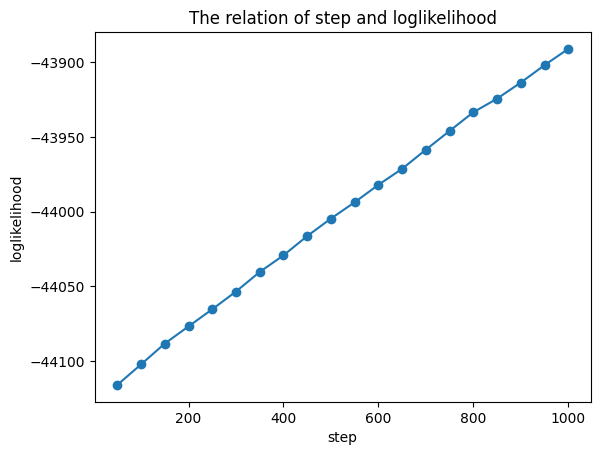

In [40]:
plt.figure()
plt.plot(step_list,loglikelihood_List,"-o")
plt.xlabel("step")
plt.ylabel("loglikelihood")
plt.title("The relation of step and loglikelihood")

Therefore, it is definitely not converge.

In [41]:
# Real trainning

In [42]:
def logistic_regression_real(): 
    # Initialize B 
    B = [[1]]*(len(new_token2)+1)
    B = np.array(B)
    
    d = log_likelihood(B)
    diff = 1
    epochs = 30
    
    f1_score_list = []

    loglikelihood_list = []

    step_list = []

    step = 0
    t = True
    for i in range(epochs):
        ran_list = random.sample(range(0, len(list_token)), len(list_token))
        for j in range(len(ran_list)):
            if t:
                k = ran_list[j]
                x = mat_coo.tocsr()[np.array([k]),:]*B
                B = B - np.transpose(0.005*((sigmoid(x)-int(train_file["sarcastic"][k]))*mat_coo.tocsr()[np.array([k]),:]))
                step = step + 1
                if step % 1000 == 0 and abs(diff)>0.00001:
                    c = log_likelihood(B)
                    diff = c - d
                    d = c
                    print(f'log-likelihood: {c[0][0]}')
                    print(f'difference: {diff[0][0]}')
                    f1 = get_test_fscore(B)
                    print(f'f1 score: {f1}')
                    loglikelihood_list.append(c[0][0])
                    f1_score_list.append(f1)
                    step_list.append(step)
                elif abs(diff)<=0.00001:
                    return step_list, loglikelihood_list, f1_score_list, B
                    t = False
    return step_list, loglikelihood_list, f1_score_list, B


In [43]:
step_list, loglikelihood_list, f1_score_list, B = logistic_regression_real()

log-likelihood: -21354.093130406247
difference: 22774.18798204699
f1 score: 0.28289473684210525
log-likelihood: -8099.522487133816
difference: 13254.570643272431
f1 score: 0.3515151515151515
log-likelihood: -5325.826131539704
difference: 2773.696355594112
f1 score: 0.3877551020408163
log-likelihood: -4882.86379220953
difference: 442.96233933017356
f1 score: 0.34146341463414637
log-likelihood: -4746.545593272896
difference: 136.31819893663396
f1 score: 0.35000000000000003
log-likelihood: -4627.515136970084
difference: 119.03045630281213
f1 score: 0.35000000000000003
log-likelihood: -4490.394024714397
difference: 137.12111225568697
f1 score: 0.32911392405063294
log-likelihood: -4385.662017496028
difference: 104.73200721836929
f1 score: 0.3076923076923077
log-likelihood: -4279.613194202184
difference: 106.04882329384418
f1 score: 0.3037974683544304
log-likelihood: -4181.919288693491
difference: 97.6939055086932
f1 score: 0.3
log-likelihood: -4101.0022590944955
difference: 80.9170295989952

log-likelihood: -2206.063905107512
difference: 9.595942137213115
f1 score: 0.33766233766233766
log-likelihood: -2197.0097246391438
difference: 9.054180468368031
f1 score: 0.3333333333333333
log-likelihood: -2187.96687038738
difference: 9.042854251763856
f1 score: 0.33766233766233766
log-likelihood: -2179.9691941068672
difference: 7.997676280512678
f1 score: 0.35000000000000003
log-likelihood: -2172.4611566845233
difference: 7.508037422343932
f1 score: 0.35000000000000003
log-likelihood: -2165.075104634183
difference: 7.386052050340368
f1 score: 0.33766233766233766
log-likelihood: -2161.5070635376496
difference: 3.5680410965333067
f1 score: 0.31999999999999995
log-likelihood: -2149.6789352429937
difference: 11.828128294655926
f1 score: 0.35000000000000003
log-likelihood: -2140.2896923598937
difference: 9.389242883099996
f1 score: 0.3333333333333333
log-likelihood: -2131.2606751625917
difference: 9.029017197301982
f1 score: 0.35443037974683544
log-likelihood: -2124.5922847340325
differen

Text(0.5, 1.0, 'The relation of step and loglikelihood for the model')

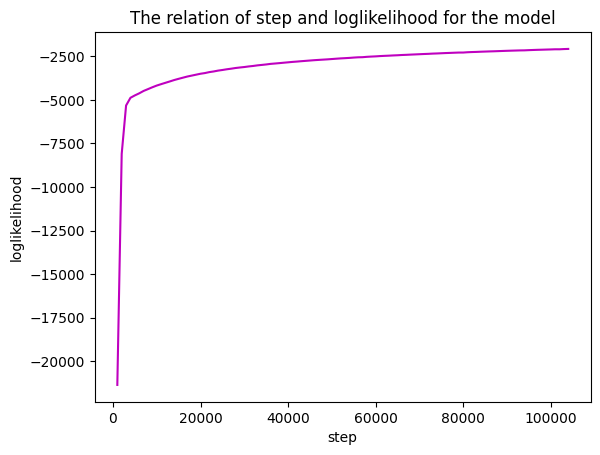

In [44]:
plt.figure()
plt.plot(step_list,loglikelihood_list,"-m")
plt.xlabel("step")
plt.ylabel("loglikelihood")
plt.title("The relation of step and loglikelihood for the model")

Text(0.5, 1.0, 'The relationship of step and f1_score for the model')

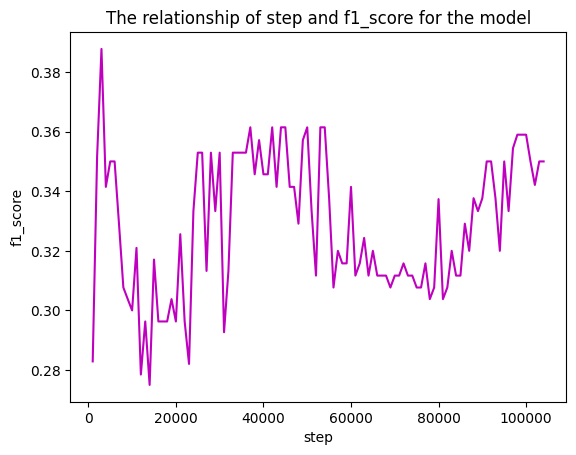

In [45]:
plt.figure()
plt.plot(step_list,f1_score_list,"-m")
plt.xlabel("step")
plt.ylabel("f1_score")
plt.title("The relationship of step and f1_score for the model")

In [46]:
# For test dataset

In [47]:
test = pd.read_csv("si630w23-hw1.test.csv")

In [48]:
def predict(beta,test_set):
    test_mat_coo = get_sparse_matrix(test_set)
    label = []
    for i in range(1400):
        c = sigmoid(test_mat_coo.tocsr()[np.array([i]),:]*beta)
        if c <0.5:
            c = 0
        else: 
            c = 1
        label.append(c)
    return label

In [49]:
label = predict(B,test)

In [50]:
df = pd.DataFrame(label,columns=["prediction"])
df.index.name="index"
df.to_csv('numpy_predict.csv')

# Part 3

In [51]:
import torch
import torch.nn as nn

In [52]:
def to_sparse_tensor(matrix):
    matrix_new = torch.Tensor(matrix)
    return matrix_new

In [53]:
def get_new_data():
    # Train set
    y_train = np.array(train_file["sarcastic"])
    y_train = torch.tensor(y_train)
    mat_coo_part3 = mat_coo.todense()
    mat_coo_part3 = torch.tensor(mat_coo_part3)
    mat_coo_part3 = mat_coo_part3.to_sparse_csr()
    X_train = mat_coo_part3
    # Dev set
    y_dev = np.array(dev["sarcastic"])
    y_dev = torch.tensor(y_dev)
    mat_coo_new2 = dev_mat_coo.todense()
    mat_coo_new2 = torch.tensor(mat_coo_new2)
    X_dev = mat_coo_new2.to_sparse_csr()
    # Test set
    test_mat_coo = get_sparse_matrix(test)
    test_mat_coo_new = test_mat_coo.todense()
    test_mat_coo_new = torch.tensor(test_mat_coo_new)
    X_test = test_mat_coo_new.to_sparse_csr()
    return X_train, y_train, X_dev, y_dev, X_test

In [54]:
X_train, y_train, X_dev, y_dev, X_test = get_new_data()

/var/folders/pc/2bcs5scj259ct_h4r90409jc0000gn/T/ipykernel_5801/2611035125.py:7: UserWarning: Sparse CSR tensor support is in beta state. If you miss a functionality in the sparse tensor support, please submit a feature request to https://github.com/pytorch/pytorch/issues. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/SparseCsrTensorImpl.cpp:56.)
  mat_coo_part3 = mat_coo_part3.to_sparse_csr()


In [55]:
class LogisticRegression(nn.Module):
    
    def __init__(self,n_input_features):
        super(LogisticRegression,self).__init__()
        self.linear=torch.nn.Linear(n_input_features,1)
        
    def forward(self,x):
        y_predicted=torch.sigmoid(self.linear(x))
        return y_predicted

In [56]:
learning_rate = 0.05
model=LogisticRegression(3896)

In [57]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [58]:
X_train = X_train.to(torch.float32)
y_train = y_train.to(torch.float32)
y_train = y_train.unsqueeze(1)
X_dev = X_dev.to(torch.float32)
y_dev = y_dev.to(torch.float32)
X_test = X_test.to(torch.float32)

In [59]:
def get_f1_score():
    with torch.no_grad():
        true_positive = 0
        false_positive = 0
        false_negative = 0
        y_predicted_1 = model(X_dev)
        y_predicted_cls = y_predicted_1.round()
        for i in range(len(y_predicted_cls)):
            if y_dev[i] == 1 and y_predicted_cls[i] == 1:
                true_positive = true_positive+1
            elif y_dev[i] == 0 and y_predicted_cls[i] == 1:
                false_positive = false_positive + 1
            elif y_dev[i] == 1 and y_predicted_cls[i] == 0:
                false_negative = false_negative+1
        if true_positive+false_positive == 0 or true_positive+false_negative == 0:
            return 0
        else:
            Precision = true_positive/(true_positive+false_positive)
            Recall = true_positive/(true_positive+false_negative)
            if Precision+Recall == 0:
                return 0
            else: 
                F1_Score = 2 * (Precision * Recall) / (Precision + Recall)
                return F1_Score

Like you did for the numpy code, train your model for a total of 1000 steps (i.e., only showing it 1000 randomly sampled documents) and report the loss after each 50 steps. This should verify that the loss is going down.

In [60]:
loss1 = []

epochs = 1

for epoch in range(epochs):
    
    for i in range(1000):

        y_predicted = model(X_train)

        loss = criterion(y_predicted, y_train) 

        optimizer.zero_grad()

        loss.backward() 

        optimizer.step() 

        if (i+1)%50 == 0:
            print(f'step:{i+1}, loss={loss.item():.4f}')
            loss1.append(loss.item())

step:50, loss=0.5643
step:100, loss=0.5577
step:150, loss=0.5541
step:200, loss=0.5510
step:250, loss=0.5481
step:300, loss=0.5455
step:350, loss=0.5430
step:400, loss=0.5407
step:450, loss=0.5385
step:500, loss=0.5364
step:550, loss=0.5345
step:600, loss=0.5326
step:650, loss=0.5308
step:700, loss=0.5291
step:750, loss=0.5274
step:800, loss=0.5258
step:850, loss=0.5243
step:900, loss=0.5228
step:950, loss=0.5213
step:1000, loss=0.5199


Text(0.5, 1.0, 'The relationship of step and loss')

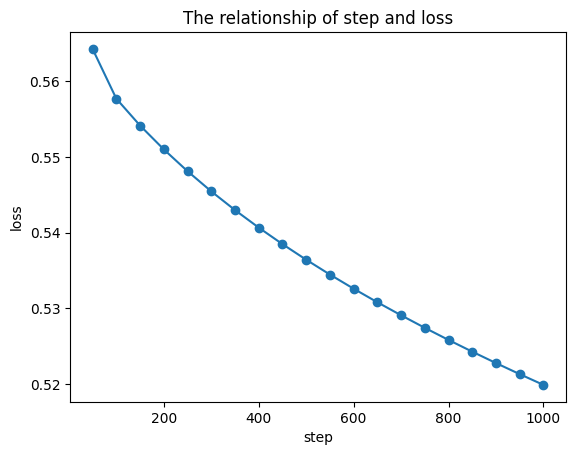

In [61]:
x = np.array([50,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850,900,950,1000])
plt.figure()
plt.plot(x,loss1,"-o")
plt.xlabel("step")
plt.ylabel("loss")
plt.title("The relationship of step and loss")

First of all, I train my model for a total of 1000 steps and find that the loss is going down as the steps increased.

Once you’re satisfied that the model is working, train your model for at least 5 epochs and compute (and save) both (1) the loss every 1000 steps and (2) the F1 score of the model on the development data.

In [62]:
X_train, y_train, X_dev, y_dev, X_test = get_new_data()
learning_rate = 0.05
model=LogisticRegression(3896)
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
X_train = X_train.to(torch.float32)
y_train = y_train.to(torch.float32)
y_train = y_train.unsqueeze(1)
X_dev = X_dev.to(torch.float32)
y_dev = y_dev.to(torch.float32)
X_test = X_test.to(torch.float32)

In [63]:
loss_list = []

f1_list = []

epochs = 10

step = 0

x = []

for epoch in range(epochs):
    
    for i in range(len(y_train)):

        y_predicted = model(X_train)

        loss = criterion(y_predicted, y_train) 

        optimizer.zero_grad()

        loss.backward() 

        optimizer.step() 
        
        step = step + 1
        
        if (step+1)%1000 == 0:
            print(f'epoch:{epoch+1}, loss={loss.item():.4f}')
            f1 = get_f1_score()
            print(f'f1:{f1}')
            loss_list.append(loss.item())
            f1_list.append(f1)
            x.append(step+1)

epoch:1, loss=0.5198
f1:0
epoch:1, loss=0.4966
f1:0.04545454545454545
epoch:1, loss=0.4789
f1:0.08695652173913045
epoch:2, loss=0.4643
f1:0.12244897959183673
epoch:2, loss=0.4516
f1:0.19607843137254904
epoch:2, loss=0.4405
f1:0.19607843137254904
epoch:3, loss=0.4305
f1:0.18867924528301888
epoch:3, loss=0.4214
f1:0.18867924528301888
epoch:3, loss=0.4130
f1:0.18867924528301888
epoch:3, loss=0.4053
f1:0.1818181818181818
epoch:4, loss=0.3981
f1:0.2068965517241379
epoch:4, loss=0.3914
f1:0.19672131147540986
epoch:4, loss=0.3851
f1:0.19354838709677416
epoch:5, loss=0.3791
f1:0.1904761904761905
epoch:5, loss=0.3734
f1:0.1904761904761905
epoch:5, loss=0.3680
f1:0.21875
epoch:5, loss=0.3629
f1:0.24615384615384617
epoch:6, loss=0.3580
f1:0.2727272727272727
epoch:6, loss=0.3533
f1:0.26865671641791045
epoch:6, loss=0.3488
f1:0.29411764705882354
epoch:7, loss=0.3445
f1:0.29411764705882354
epoch:7, loss=0.3404
f1:0.29411764705882354
epoch:7, loss=0.3364
f1:0.29411764705882354
epoch:7, loss=0.3325
f1

Text(0.5, 1.0, 'The relationship of step and loss for the model')

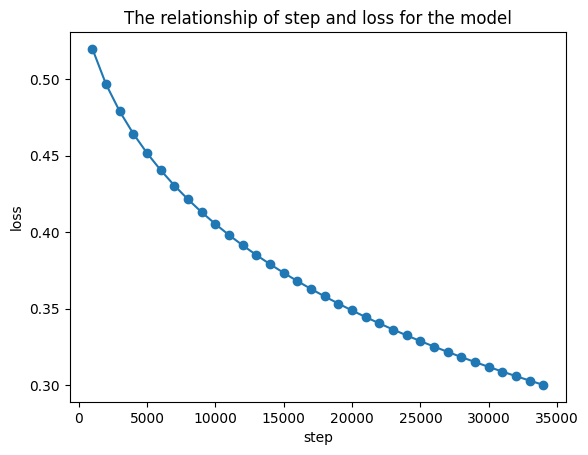

In [64]:
plt.figure()
plt.plot(x,loss_list,"-o")
plt.xlabel("step")
plt.ylabel("loss")
plt.title("The relationship of step and loss for the model")

Text(0.5, 1.0, 'The relationship of step and f1_score for the model')

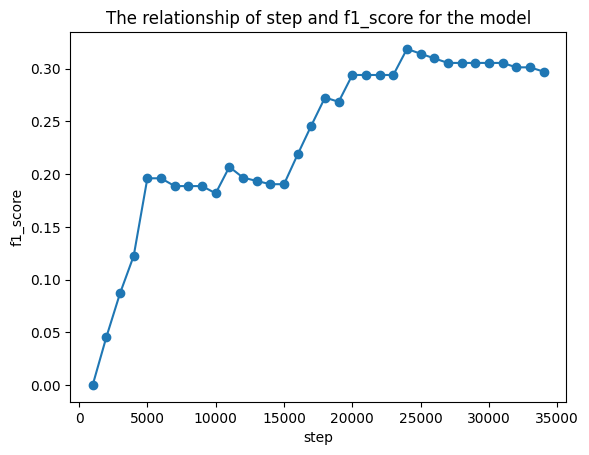

In [65]:
plt.figure()
plt.plot(x,f1_list,"-o")
plt.xlabel("step")
plt.ylabel("f1_score")
plt.title("The relationship of step and f1_score for the model")

Here is the result for the relationship of step with loss and f1 score. We can find as the steps increase from 0 to 10000, the loss goes down dramatically; after that, it decreases relatively slightly way. For the F1 score, we can find as the steps increase, it first goes up and then goes down slightly (it might be because of the overfitting), the final f1 score for this model is about 0.3.

In [66]:
# Predict for test set
def get_predict():
    y_test_predicted = model(X_test)
    y_test_predicted_cls = y_test_predicted.round()
    y_test_value = y_test_predicted_cls.cpu().detach().numpy()
    return y_test_value

y_test_value = get_predict()

label_list = []
for i in y_test_value:
    label_list.append(int(i[0]))
    
df = pd.DataFrame(label_list,columns=["prediction"])
df.index.name="index"
df.to_csv('pytorch_predict.csv')

Let’s see what are the effects of adding regularization.

In [67]:
X_train, y_train, X_dev, y_dev, X_test = get_new_data()
learning_rate = 0.05
model=LogisticRegression(3896)
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay = 0)
X_train = X_train.to(torch.float32)
y_train = y_train.to(torch.float32)
y_train = y_train.unsqueeze(1)
X_dev = X_dev.to(torch.float32)
y_dev = y_dev.to(torch.float32)
X_test = X_test.to(torch.float32)

In [68]:
loss_for_no_weight_decay = []

f1_for_no_weight_decay = []

epochs = 1

for epoch in range(epochs):
    
    for i in range(len(y_train)):

        y_predicted = model(X_train)

        loss = criterion(y_predicted, y_train) 

        optimizer.zero_grad()

        loss.backward() 

        optimizer.step() 

        if (i+1)%50 == 0:
            print(f'step:{i+1}, loss={loss.item():.4f}')
            f1 = get_f1_score()
            print(f'f1:{f1}')
            loss_for_no_weight_decay.append(loss.item())
            f1_for_no_weight_decay.append(f1)

step:50, loss=0.5645
f1:0
step:100, loss=0.5577
f1:0
step:150, loss=0.5541
f1:0
step:200, loss=0.5509
f1:0
step:250, loss=0.5480
f1:0
step:300, loss=0.5453
f1:0
step:350, loss=0.5428
f1:0
step:400, loss=0.5405
f1:0
step:450, loss=0.5383
f1:0
step:500, loss=0.5362
f1:0
step:550, loss=0.5342
f1:0
step:600, loss=0.5324
f1:0
step:650, loss=0.5306
f1:0
step:700, loss=0.5289
f1:0
step:750, loss=0.5272
f1:0
step:800, loss=0.5256
f1:0
step:850, loss=0.5241
f1:0
step:900, loss=0.5226
f1:0
step:950, loss=0.5211
f1:0
step:1000, loss=0.5197
f1:0
step:1050, loss=0.5183
f1:0
step:1100, loss=0.5169
f1:0.04545454545454545
step:1150, loss=0.5156
f1:0.04545454545454545
step:1200, loss=0.5143
f1:0.04545454545454545
step:1250, loss=0.5131
f1:0.04545454545454545
step:1300, loss=0.5118
f1:0.04545454545454545
step:1350, loss=0.5106
f1:0.04545454545454545
step:1400, loss=0.5094
f1:0.04545454545454545
step:1450, loss=0.5082
f1:0.04545454545454545
step:1500, loss=0.5071
f1:0.04545454545454545
step:1550, loss=0.

In [69]:
X_train, y_train, X_dev, y_dev, X_test = get_new_data()
learning_rate = 0.05
model=LogisticRegression(3896)
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay = 0.001)
X_train = X_train.to(torch.float32)
y_train = y_train.to(torch.float32)
y_train = y_train.unsqueeze(1)
X_dev = X_dev.to(torch.float32)
y_dev = y_dev.to(torch.float32)
X_test = X_test.to(torch.float32)

In [70]:
loss_for_small_weight_decay = []

f1_for_small_weight_decay = []

epochs = 1

for epoch in range(epochs):
    
    for i in range(len(y_train)):
        
        y_predicted = model(X_train)

        loss = criterion(y_predicted, y_train) 

        optimizer.zero_grad()

        loss.backward() 

        optimizer.step() 

        if (i+1)%50 == 0:
            print(f'step:{i+1}, loss={loss.item():.4f}')
            f1 = get_f1_score()
            print(f'f1:{f1}')
            loss_for_small_weight_decay.append(loss.item())
            f1_for_small_weight_decay.append(f1)

step:50, loss=0.5642
f1:0
step:100, loss=0.5576
f1:0
step:150, loss=0.5540
f1:0
step:200, loss=0.5509
f1:0
step:250, loss=0.5480
f1:0
step:300, loss=0.5454
f1:0
step:350, loss=0.5429
f1:0
step:400, loss=0.5406
f1:0
step:450, loss=0.5385
f1:0
step:500, loss=0.5365
f1:0
step:550, loss=0.5345
f1:0
step:600, loss=0.5327
f1:0
step:650, loss=0.5310
f1:0
step:700, loss=0.5293
f1:0
step:750, loss=0.5277
f1:0
step:800, loss=0.5261
f1:0
step:850, loss=0.5246
f1:0
step:900, loss=0.5232
f1:0
step:950, loss=0.5218
f1:0
step:1000, loss=0.5204
f1:0
step:1050, loss=0.5191
f1:0
step:1100, loss=0.5178
f1:0
step:1150, loss=0.5165
f1:0.04545454545454545
step:1200, loss=0.5153
f1:0.04545454545454545
step:1250, loss=0.5141
f1:0.04545454545454545
step:1300, loss=0.5129
f1:0.04545454545454545
step:1350, loss=0.5118
f1:0.04545454545454545
step:1400, loss=0.5106
f1:0.04545454545454545
step:1450, loss=0.5095
f1:0.04545454545454545
step:1500, loss=0.5084
f1:0.04545454545454545
step:1550, loss=0.5074
f1:0.04545454

In [71]:
X_train, y_train, X_dev, y_dev, X_test = get_new_data()
learning_rate = 0.05
model=LogisticRegression(3896)
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay = 0.1)
X_train = X_train.to(torch.float32)
y_train = y_train.to(torch.float32)
y_train = y_train.unsqueeze(1)
X_dev = X_dev.to(torch.float32)
y_dev = y_dev.to(torch.float32)
X_test = X_test.to(torch.float32)

In [72]:
loss_for_large_weight_decay = []

f1_for_large_weight_decay = []

epochs = 1

for epoch in range(epochs):
    
    for i in range(len(y_train)):
        
        y_predicted = model(X_train)

        loss = criterion(y_predicted, y_train) 

        optimizer.zero_grad()

        loss.backward() 

        optimizer.step() 

        if (i+1)%50 == 0:
            print(f'step:{i+1}, loss={loss.item():.4f}')
            f1 = get_f1_score()
            print(f'f1:{f1}')
            loss_for_large_weight_decay.append(loss.item())
            f1_for_large_weight_decay.append(f1)

step:50, loss=0.5676
f1:0
step:100, loss=0.5613
f1:0
step:150, loss=0.5590
f1:0
step:200, loss=0.5576
f1:0
step:250, loss=0.5566
f1:0
step:300, loss=0.5558
f1:0
step:350, loss=0.5553
f1:0
step:400, loss=0.5549
f1:0
step:450, loss=0.5546
f1:0
step:500, loss=0.5544
f1:0
step:550, loss=0.5542
f1:0
step:600, loss=0.5541
f1:0
step:650, loss=0.5540
f1:0
step:700, loss=0.5539
f1:0
step:750, loss=0.5539
f1:0
step:800, loss=0.5538
f1:0
step:850, loss=0.5538
f1:0
step:900, loss=0.5538
f1:0
step:950, loss=0.5537
f1:0
step:1000, loss=0.5537
f1:0
step:1050, loss=0.5537
f1:0
step:1100, loss=0.5537
f1:0
step:1150, loss=0.5537
f1:0
step:1200, loss=0.5537
f1:0
step:1250, loss=0.5537
f1:0
step:1300, loss=0.5537
f1:0
step:1350, loss=0.5537
f1:0
step:1400, loss=0.5537
f1:0
step:1450, loss=0.5537
f1:0
step:1500, loss=0.5537
f1:0
step:1550, loss=0.5537
f1:0
step:1600, loss=0.5537
f1:0
step:1650, loss=0.5537
f1:0
step:1700, loss=0.5537
f1:0
step:1750, loss=0.5537
f1:0
step:1800, loss=0.5537
f1:0
step:1850, l

Text(0.5, 1.0, 'The relationship of step and loss for different weight_decay')

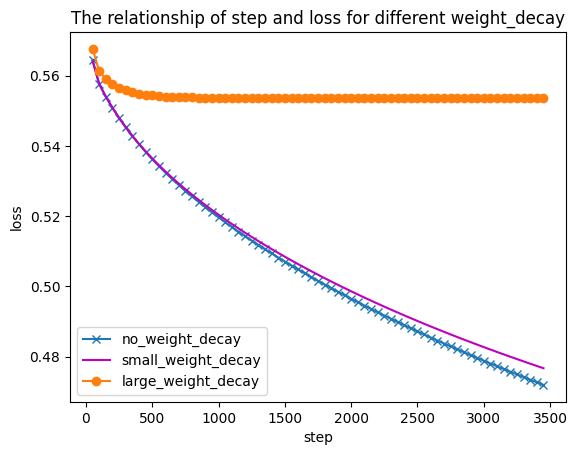

In [73]:
x = np.array(range(50,3467,50))
plt.figure()
plt.plot(x,loss_for_no_weight_decay,"-x",x,loss_for_small_weight_decay,"-m",x,loss_for_large_weight_decay,"-o",)
plt.legend(["no_weight_decay","small_weight_decay","large_weight_decay"])
plt.xlabel("step")
plt.ylabel("loss")
plt.title("The relationship of step and loss for different weight_decay")

In the relationship between the step and loss figure, we can see that with the increase of the L2 penalty, the decrease of loss becomes slow. That is because the L2 penalty is designed for combating overfitting by forcing weights to be small; therefore, it will make the change slightly and might avoid the overfitting problem. However, when we set the L2 penalty to 0.1, it will cause over-regularization which makes the decrease of loss very slow. Therefore, improving L2 will cause a decrease in convergence speed.

Text(0.5, 1.0, 'The relationship of step and f1_score for different weight_decay')

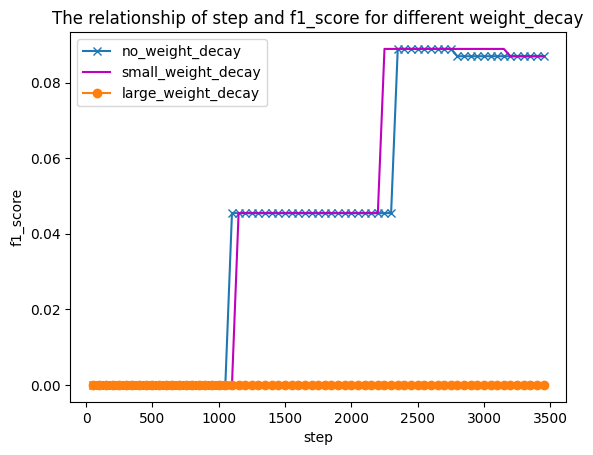

In [74]:
x = np.array(range(50,3467,50))
plt.figure()
plt.plot(x,f1_for_no_weight_decay,"-x",x,f1_for_small_weight_decay,"-m",x,f1_for_large_weight_decay,"-o",)
plt.legend(["no_weight_decay","small_weight_decay","large_weight_decay"])
plt.xlabel("step")
plt.ylabel("f1_score")
plt.title("The relationship of step and f1_score for different weight_decay")

In the relationship between the step and the f1 score figure, we can see that with the increase of the L2 penalty, the increase of the f1 score becomes slow. A small L2 penalty might help improve the performance of this model, but when we set the L2 penalty as 0.1, it will make the model bad.

For this step, replace your SGD optimizer with two other common alternatives RMSprop and AdamW.

In [75]:
X_train, y_train, X_dev, y_dev, X_test = get_new_data()
learning_rate = 0.05
model=LogisticRegression(3896)
criterion = nn.BCELoss()
optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)
X_train = X_train.to(torch.float32)
y_train = y_train.to(torch.float32)
y_train = y_train.unsqueeze(1)
X_dev = X_dev.to(torch.float32)
y_dev = y_dev.to(torch.float32)
X_test = X_test.to(torch.float32)

In [76]:
loss_for_RMSprop = []

f1_for_RMSprop = []

epochs = 1

for epoch in range(epochs):
    
    for i in range(len(y_train)):
        
        y_predicted = model(X_train)

        loss = criterion(y_predicted, y_train) 

        optimizer.zero_grad()

        loss.backward() 

        optimizer.step() 

        if (i+1)%50 == 0:
            print(f'step:{i+1}, loss={loss.item():.4f}')
            f1 = get_f1_score()
            print(f'f1:{f1}')
            loss_for_RMSprop.append(loss.item())
            f1_for_RMSprop.append(f1)

step:50, loss=0.0731
f1:0.205607476635514
step:100, loss=0.0442
f1:0.23008849557522124
step:150, loss=0.0315
f1:0.24137931034482757
step:200, loss=0.0242
f1:0.2521008403361345
step:250, loss=0.0192
f1:0.25806451612903225
step:300, loss=0.0156
f1:0.25806451612903225
step:350, loss=0.0129
f1:0.25600000000000006
step:400, loss=0.0108
f1:0.25196850393700787
step:450, loss=0.0091
f1:0.25
step:500, loss=0.0078
f1:0.25
step:550, loss=0.0067
f1:0.26153846153846155
step:600, loss=0.0059
f1:0.24427480916030533
step:650, loss=0.0052
f1:0.2406015037593985
step:700, loss=0.0047
f1:0.2424242424242424
step:750, loss=0.0043
f1:0.2406015037593985
step:800, loss=0.0039
f1:0.2388059701492537
step:850, loss=0.0036
f1:0.25
step:900, loss=0.0034
f1:0.25
step:950, loss=0.0032
f1:0.2481751824817518
step:1000, loss=0.0031
f1:0.2518518518518518
step:1050, loss=0.0030
f1:0.25
step:1100, loss=0.0029
f1:0.2463768115942029
step:1150, loss=0.0028
f1:0.2446043165467626
step:1200, loss=0.0028
f1:0.2446043165467626
ste

In [77]:
X_train, y_train, X_dev, y_dev, X_test = get_new_data()
learning_rate = 0.05
model=LogisticRegression(3896)
criterion = nn.BCELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)
X_train = X_train.to(torch.float32)
y_train = y_train.to(torch.float32)
y_train = y_train.unsqueeze(1)
X_dev = X_dev.to(torch.float32)
y_dev = y_dev.to(torch.float32)
X_test = X_test.to(torch.float32)

In [78]:
loss_for_AdamW = []

f1_for_AdamW = []

epochs = 1

for epoch in range(epochs):
    
    for i in range(len(y_train)):
        
        y_predicted = model(X_train)

        loss = criterion(y_predicted, y_train) 

        optimizer.zero_grad()

        loss.backward() 

        optimizer.step() 

        if (i+1)%50 == 0:
            print(f'step:{i+1}, loss={loss.item():.4f}')
            f1 = get_f1_score()
            print(f'f1:{f1}')
            loss_for_AdamW.append(loss.item())
            f1_for_AdamW.append(f1)

step:50, loss=0.1188
f1:0.23157894736842105
step:100, loss=0.0676
f1:0.2135922330097087
step:150, loss=0.0479
f1:0.2568807339449541
step:200, loss=0.0375
f1:0.25
step:250, loss=0.0310
f1:0.2456140350877193
step:300, loss=0.0265
f1:0.2542372881355932
step:350, loss=0.0233
f1:0.2521008403361345
step:400, loss=0.0208
f1:0.25
step:450, loss=0.0188
f1:0.24590163934426226
step:500, loss=0.0172
f1:0.24793388429752067
step:550, loss=0.0159
f1:0.24590163934426226
step:600, loss=0.0148
f1:0.24590163934426226
step:650, loss=0.0139
f1:0.2439024390243903
step:700, loss=0.0131
f1:0.2439024390243903
step:750, loss=0.0124
f1:0.24193548387096772
step:800, loss=0.0118
f1:0.24000000000000002
step:850, loss=0.0112
f1:0.25196850393700787
step:900, loss=0.0108
f1:0.25196850393700787
step:950, loss=0.0103
f1:0.25196850393700787
step:1000, loss=0.0099
f1:0.24806201550387594
step:1050, loss=0.0096
f1:0.24806201550387594
step:1100, loss=0.0093
f1:0.24806201550387594
step:1150, loss=0.0090
f1:0.24806201550387594

Text(0.5, 1.0, 'The relationship of step and loss for different optimizer')

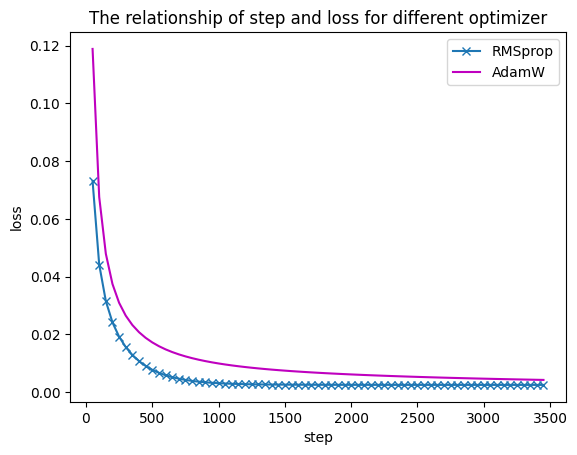

In [79]:
x = np.array(range(50,3467,50))
plt.figure()
plt.plot(x,loss_for_RMSprop,"-x",x,loss_for_AdamW,"-m")
plt.legend(["RMSprop","AdamW"])
plt.xlabel("step")
plt.ylabel("loss")
plt.title("The relationship of step and loss for different optimizer")

Both of the loss functions drop dramatically within the first 1000 steps; after that, they keep almost unchanged. Therefore, RMSprop and AdamW optimizers will cause quick convergence.

Text(0.5, 1.0, 'The relationship of step and f1_score for different optimizer')

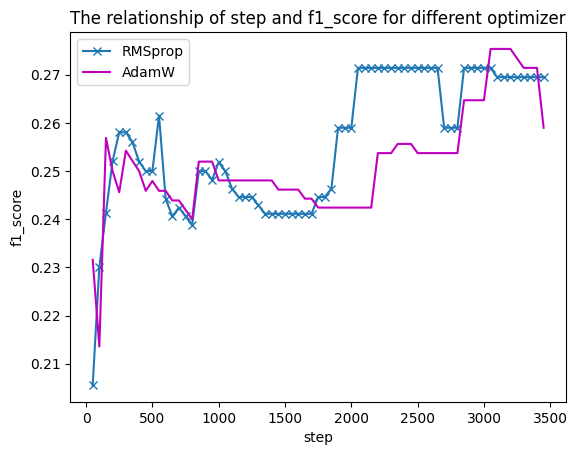

In [80]:
x = np.array(range(50,3467,50))
plt.figure()
plt.plot(x,f1_for_RMSprop,"-x",x,f1_for_AdamW,"-m")
plt.legend(["RMSprop","AdamW"])
plt.xlabel("step")
plt.ylabel("f1_score")
plt.title("The relationship of step and f1_score for different optimizer")

For the f1 score, both of them increase dramatically within the first 250 steps; after that, it vibrates between 0.24 to 0.26, and finally reaches a high f1 score of about 0.27 and continues to vibrate around 0.27. This score is lower than the score I get before (0.3), the performance of the two optimizers is worse than the SGD optimizer.

Two methods for tokenizing

In [81]:

txt3 = []
for index, row in train_file.iterrows():
    txt3.append(row['text'])
list_token3 = []
for i in range(len(txt3)):
    text3 = tokenize(txt3[i])
    list_token3.append(text3)
str_token3 = ""
for i in range(len(list_token3)):
    str_token3 = str_token3 + ' '.join(list_token3[i]) + " "
total3 = re.findall("[\S]+",str_token3)
new_token3 = [*set(total3)]
counter3 = Counter(total3)
for letter in counter3.keys():
    if counter3[letter] < 2:
        if letter in new_token3:
            new_token3.remove(letter)

In [82]:
row_index3 = []
col_index3 = []
data3 = []
for i in range(len(list_token3)):
    for j in range(len(list_token3[i])):
        for k in range(len(new_token3)):
            if new_token3[k] == list_token3[i][j]:
                row_index3.append(i)
                col_index3.append(k)
                data3.append(1)
row_ind3 = np.array(row_index3)
col_ind3 = np.array(col_index3)
data_value3 = np.array(data3)
mat_coo3 = sparse.coo_matrix((data_value3, (row_ind3, col_ind3)))
ones = [[1]]*3467
ones = np.array(ones)
mat_coo3.todense()
c = np.hstack((mat_coo3.todense(),ones))
mat_coo3 = sparse.csr_matrix(c)



In [83]:
# get the sparse matrix for Dev dataset with another token method
def get_sparse_matrix3(data):
    txt_new = []
    for index, row in data.iterrows():
        txt_new.append(row['text'])
    list_token_new = []
    for i in range(len(txt_new)):
        text = better_tokenize(txt_new[i])
        list_token_new.append(text)
    row_index_new = []
    col_index_new = []
    data_new = []
    for i in range(len(list_token_new)):
        for j in range(len(list_token_new[i])):
            for k in range(len(new_token3)):
                if new_token3[k] == list_token_new[i][j]:
                    row_index_new.append(i)
                    col_index_new.append(k)
                    data_new.append(1)
    row_ind_new = np.array(row_index_new)
    col_ind_new = np.array(col_index_new)
    data_value_new = np.array(data_new)
    mat_coo_new = sparse.coo_matrix((data_value_new, (row_ind_new, col_ind_new)))
    ones_new = [[0]]*len(data)
    ones_new = np.array(ones_new)
    mat_coo_new = mat_coo_new.todense()
    for i in range(len(new_token3)-mat_coo_new.shape[1]):
        c = np.hstack((mat_coo_new,ones_new))
        mat_coo_new = c
    ones_new = [[1]]*len(data)
    ones_new = np.array(ones_new)
    c = np.hstack((mat_coo_new,ones_new))
    mat_coo_new3 = sparse.csr_matrix(c)
    return mat_coo_new3

In [84]:
mat_coo_new3 = get_sparse_matrix3(dev)

In [85]:
y_train = np.array(train_file["sarcastic"])
y_train = torch.tensor(y_train)
mat_coo3 = mat_coo3.todense()
mat_coo3 = torch.tensor(mat_coo3)
mat_coo3 = mat_coo3.to_sparse_csr()
X_train = mat_coo3
# Dev set
y_dev = np.array(dev["sarcastic"])
y_dev = torch.tensor(y_dev)
mat_coo_new3 = mat_coo_new3.todense()
mat_coo_new3 = torch.tensor(mat_coo_new3)
X_dev = mat_coo_new3.to_sparse_csr()
# Test set
test_mat_coo = get_sparse_matrix(test)
test_mat_coo_new = test_mat_coo.todense()
test_mat_coo_new = torch.tensor(test_mat_coo_new)
X_test = test_mat_coo_new.to_sparse_csr()



In [86]:
learning_rate = 0.05
model=LogisticRegression(4304)
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
X_train = X_train.to(torch.float32)
y_train = y_train.to(torch.float32)
y_train = y_train.unsqueeze(1)
X_dev = X_dev.to(torch.float32)
y_dev = y_dev.to(torch.float32)
X_test = X_test.to(torch.float32)

In [87]:
loss_for_token = []

f1_for_token = []

epochs = 1

for epoch in range(epochs):
    
    for i in range(len(y_train)):
        
        y_predicted = model(X_train)

        loss = criterion(y_predicted, y_train) 

        optimizer.zero_grad()

        loss.backward() 

        optimizer.step() 

        if (i+1)%50 == 0:
            print(f'step:{i+1}, loss={loss.item():.4f}')
            f1 = get_f1_score()
            print(f'f1:{f1}')
            loss_for_token.append(loss.item())
            f1_for_token.append(f1)

step:50, loss=0.5672
f1:0
step:100, loss=0.5599
f1:0
step:150, loss=0.5567
f1:0
step:200, loss=0.5539
f1:0
step:250, loss=0.5514
f1:0
step:300, loss=0.5490
f1:0
step:350, loss=0.5468
f1:0
step:400, loss=0.5447
f1:0
step:450, loss=0.5428
f1:0
step:500, loss=0.5409
f1:0
step:550, loss=0.5391
f1:0
step:600, loss=0.5374
f1:0
step:650, loss=0.5358
f1:0
step:700, loss=0.5342
f1:0
step:750, loss=0.5327
f1:0
step:800, loss=0.5312
f1:0
step:850, loss=0.5298
f1:0
step:900, loss=0.5284
f1:0
step:950, loss=0.5270
f1:0
step:1000, loss=0.5257
f1:0
step:1050, loss=0.5244
f1:0
step:1100, loss=0.5231
f1:0
step:1150, loss=0.5219
f1:0
step:1200, loss=0.5206
f1:0
step:1250, loss=0.5194
f1:0
step:1300, loss=0.5183
f1:0
step:1350, loss=0.5171
f1:0
step:1400, loss=0.5160
f1:0.04545454545454545
step:1450, loss=0.5149
f1:0.04545454545454545
step:1500, loss=0.5138
f1:0.04545454545454545
step:1550, loss=0.5127
f1:0.04545454545454545
step:1600, loss=0.5116
f1:0.04545454545454545
step:1650, loss=0.5105
f1:0.045454

In [113]:
X_train, y_train, X_dev, y_dev, X_test = get_new_data()
learning_rate = 0.05
model=LogisticRegression(3896)
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
X_train = X_train.to(torch.float32)
y_train = y_train.to(torch.float32)
y_train = y_train.unsqueeze(1)
X_dev = X_dev.to(torch.float32)
y_dev = y_dev.to(torch.float32)
X_test = X_test.to(torch.float32)

In [114]:
loss_for_better_token = []

f1_for_better_token = []

epochs = 1

for epoch in range(epochs):
    
    for i in range(len(y_train)):
        
        y_predicted = model(X_train)

        loss = criterion(y_predicted, y_train) 

        optimizer.zero_grad()

        loss.backward() 

        optimizer.step() 

        if (i+1)%50 == 0:
            print(f'step:{i+1}, loss={loss.item():.4f}')
            f1 = get_f1_score()
            print(f'f1:{f1}')
            loss_for_better_token.append(loss.item())
            f1_for_better_token.append(f1)

step:50, loss=0.5649
f1:0
step:100, loss=0.5582
f1:0
step:150, loss=0.5545
f1:0
step:200, loss=0.5513
f1:0
step:250, loss=0.5484
f1:0
step:300, loss=0.5457
f1:0
step:350, loss=0.5432
f1:0
step:400, loss=0.5409
f1:0
step:450, loss=0.5386
f1:0
step:500, loss=0.5366
f1:0
step:550, loss=0.5346
f1:0
step:600, loss=0.5327
f1:0
step:650, loss=0.5309
f1:0
step:700, loss=0.5292
f1:0
step:750, loss=0.5275
f1:0
step:800, loss=0.5259
f1:0
step:850, loss=0.5243
f1:0
step:900, loss=0.5228
f1:0
step:950, loss=0.5214
f1:0
step:1000, loss=0.5199
f1:0
step:1050, loss=0.5185
f1:0
step:1100, loss=0.5172
f1:0.04545454545454545
step:1150, loss=0.5159
f1:0.04545454545454545
step:1200, loss=0.5146
f1:0.04545454545454545
step:1250, loss=0.5133
f1:0.04545454545454545
step:1300, loss=0.5120
f1:0.04545454545454545
step:1350, loss=0.5108
f1:0.04545454545454545
step:1400, loss=0.5096
f1:0.04545454545454545
step:1450, loss=0.5084
f1:0.04545454545454545
step:1500, loss=0.5073
f1:0.04545454545454545
step:1550, loss=0.

Text(0.5, 1.0, 'The relationship of step and loss for different token ways')

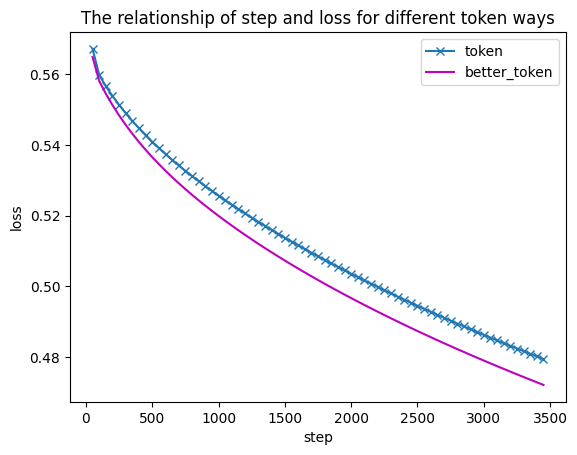

In [115]:
x = np.array(range(50,3467,50))
plt.figure()
plt.plot(x,loss_for_token,"-x",x,loss_for_better_token,"-m")
plt.legend(["token","better_token"])
plt.xlabel("step")
plt.ylabel("loss")
plt.title("The relationship of step and loss for different token ways")

Text(0.5, 1.0, 'The relationship of step and f1_score for different token ways')

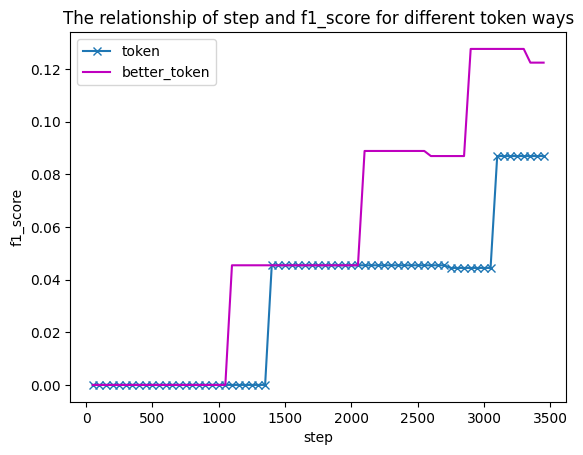

In [116]:
x = np.array(range(50,3467,50))
plt.figure()
plt.plot(x,f1_for_token,"-x",x,f1_for_better_token,"-m")
plt.legend(["token","better_token"])
plt.xlabel("step")
plt.ylabel("f1_score")
plt.title("The relationship of step and f1_score for different token ways")

We can see that when I use a better tokenizing way, the loss of the model will drop quickly and the increase of the f1 score also go up quickly. Therefore, tokenizing can influence the performance of the model; at least, it can improve the training speed of this model.

What effect does the learning rate have on our model’s convergence?

In [92]:
X_train, y_train, X_dev, y_dev, X_test = get_new_data()
learning_rate = 0.05
model=LogisticRegression(3896)
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
X_train = X_train.to(torch.float32)
y_train = y_train.to(torch.float32)
y_train = y_train.unsqueeze(1)
X_dev = X_dev.to(torch.float32)
y_dev = y_dev.to(torch.float32)
X_test = X_test.to(torch.float32)

In [93]:
loss_for_regular_lr = []

f1_for_regular_lr = []

epochs = 1

for epoch in range(epochs):
    
    for i in range(len(y_train)):
        
        y_predicted = model(X_train)

        loss = criterion(y_predicted, y_train) 

        optimizer.zero_grad()

        loss.backward() 

        optimizer.step() 

        if (i+1)%50 == 0:
            print(f'step:{i+1}, loss={loss.item():.4f}')
            f1 = get_f1_score()
            print(f'f1:{f1}')
            loss_for_regular_lr.append(loss.item())
            f1_for_regular_lr.append(f1)

step:50, loss=0.5642
f1:0
step:100, loss=0.5577
f1:0
step:150, loss=0.5542
f1:0
step:200, loss=0.5510
f1:0
step:250, loss=0.5481
f1:0
step:300, loss=0.5455
f1:0
step:350, loss=0.5430
f1:0
step:400, loss=0.5407
f1:0
step:450, loss=0.5385
f1:0
step:500, loss=0.5364
f1:0
step:550, loss=0.5345
f1:0
step:600, loss=0.5326
f1:0
step:650, loss=0.5308
f1:0
step:700, loss=0.5291
f1:0
step:750, loss=0.5274
f1:0
step:800, loss=0.5258
f1:0
step:850, loss=0.5243
f1:0
step:900, loss=0.5228
f1:0
step:950, loss=0.5213
f1:0
step:1000, loss=0.5199
f1:0
step:1050, loss=0.5185
f1:0
step:1100, loss=0.5172
f1:0
step:1150, loss=0.5159
f1:0.04545454545454545
step:1200, loss=0.5146
f1:0.04545454545454545
step:1250, loss=0.5133
f1:0.04545454545454545
step:1300, loss=0.5121
f1:0.04545454545454545
step:1350, loss=0.5108
f1:0.04545454545454545
step:1400, loss=0.5096
f1:0.04545454545454545
step:1450, loss=0.5085
f1:0.04545454545454545
step:1500, loss=0.5073
f1:0.04545454545454545
step:1550, loss=0.5062
f1:0.04545454

In [94]:
X_train, y_train, X_dev, y_dev, X_test = get_new_data()
learning_rate = 5
model=LogisticRegression(3896)
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
X_train = X_train.to(torch.float32)
y_train = y_train.to(torch.float32)
y_train = y_train.unsqueeze(1)
X_dev = X_dev.to(torch.float32)
y_dev = y_dev.to(torch.float32)
X_test = X_test.to(torch.float32)

In [95]:
loss_for_large_lr = []

f1_for_large_lr = []

epochs = 1

for epoch in range(epochs):
    
    for i in range(len(y_train)):
        
        y_predicted = model(X_train)

        loss = criterion(y_predicted, y_train) 

        optimizer.zero_grad()

        loss.backward() 

        optimizer.step() 

        if (i+1)%50 == 0:
            print(f'step:{i+1}, loss={loss.item():.4f}')
            f1 = get_f1_score()
            print(f'f1:{f1}')
            loss_for_large_lr.append(loss.item())
            f1_for_large_lr.append(f1)

step:50, loss=0.5681
f1:0
step:100, loss=0.4718
f1:0.04545454545454545
step:150, loss=0.4747
f1:0.04545454545454545
step:200, loss=0.4371
f1:0.08888888888888888
step:250, loss=0.4023
f1:0.0851063829787234
step:300, loss=0.3698
f1:0.0851063829787234
step:350, loss=0.3395
f1:0.08163265306122448
step:400, loss=0.3112
f1:0.2105263157894737
step:450, loss=0.2852
f1:0.30303030303030304
step:500, loss=0.2630
f1:0.3055555555555556
step:550, loss=0.2482
f1:0.2926829268292683
step:600, loss=0.2397
f1:0.2823529411764706
step:650, loss=0.2326
f1:0.2823529411764706
step:700, loss=0.2260
f1:0.2823529411764706
step:750, loss=0.2198
f1:0.27906976744186046
step:800, loss=0.2141
f1:0.2758620689655172
step:850, loss=0.2087
f1:0.2758620689655172
step:900, loss=0.2036
f1:0.2758620689655172
step:950, loss=0.1989
f1:0.2727272727272727
step:1000, loss=0.1944
f1:0.28260869565217395
step:1050, loss=0.1901
f1:0.28260869565217395
step:1100, loss=0.1861
f1:0.27956989247311825
step:1150, loss=0.1822
f1:0.2795698924

In [96]:
X_train, y_train, X_dev, y_dev, X_test = get_new_data()
learning_rate = 0.005
model=LogisticRegression(3896)
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
X_train = X_train.to(torch.float32)
y_train = y_train.to(torch.float32)
y_train = y_train.unsqueeze(1)
X_dev = X_dev.to(torch.float32)
y_dev = y_dev.to(torch.float32)
X_test = X_test.to(torch.float32)

In [97]:
loss_for_small_lr = []

f1_for_small_lr = []

epochs = 1

for epoch in range(epochs):
    
    for i in range(len(y_train)):
        
        y_predicted = model(X_train)

        loss = criterion(y_predicted, y_train) 

        optimizer.zero_grad()

        loss.backward() 

        optimizer.step() 

        if (i+1)%50 == 0:
            print(f'step:{i+1}, loss={loss.item():.4f}')
            f1 = get_f1_score()
            print(f'f1:{f1}')
            loss_for_small_lr.append(loss.item())
            f1_for_small_lr.append(f1)

step:50, loss=0.6502
f1:0
step:100, loss=0.6209
f1:0
step:150, loss=0.6018
f1:0
step:200, loss=0.5892
f1:0
step:250, loss=0.5807
f1:0
step:300, loss=0.5749
f1:0
step:350, loss=0.5708
f1:0
step:400, loss=0.5679
f1:0
step:450, loss=0.5657
f1:0
step:500, loss=0.5641
f1:0
step:550, loss=0.5628
f1:0
step:600, loss=0.5619
f1:0
step:650, loss=0.5610
f1:0
step:700, loss=0.5604
f1:0
step:750, loss=0.5598
f1:0
step:800, loss=0.5592
f1:0
step:850, loss=0.5587
f1:0
step:900, loss=0.5583
f1:0
step:950, loss=0.5579
f1:0
step:1000, loss=0.5575
f1:0
step:1050, loss=0.5571
f1:0
step:1100, loss=0.5567
f1:0
step:1150, loss=0.5563
f1:0
step:1200, loss=0.5560
f1:0
step:1250, loss=0.5556
f1:0
step:1300, loss=0.5553
f1:0
step:1350, loss=0.5549
f1:0
step:1400, loss=0.5546
f1:0
step:1450, loss=0.5542
f1:0
step:1500, loss=0.5539
f1:0
step:1550, loss=0.5536
f1:0
step:1600, loss=0.5532
f1:0
step:1650, loss=0.5529
f1:0
step:1700, loss=0.5526
f1:0
step:1750, loss=0.5523
f1:0
step:1800, loss=0.5520
f1:0
step:1850, l

Text(0.5, 1.0, 'The relationship of step and loss for different learning rate')

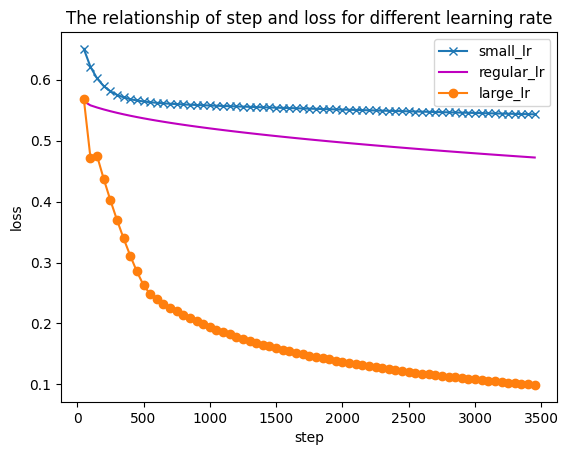

In [98]:
x = np.array(range(50,3467,50))
plt.figure()
plt.plot(x,loss_for_small_lr,"-x",x,loss_for_regular_lr,"-m",x,loss_for_large_lr,"-o")
plt.legend(["small_lr","regular_lr","large_lr"])
plt.xlabel("step")
plt.ylabel("loss")
plt.title("The relationship of step and loss for different learning rate")

Text(0.5, 1.0, 'The relationship of step and f1_score for different learning rate')

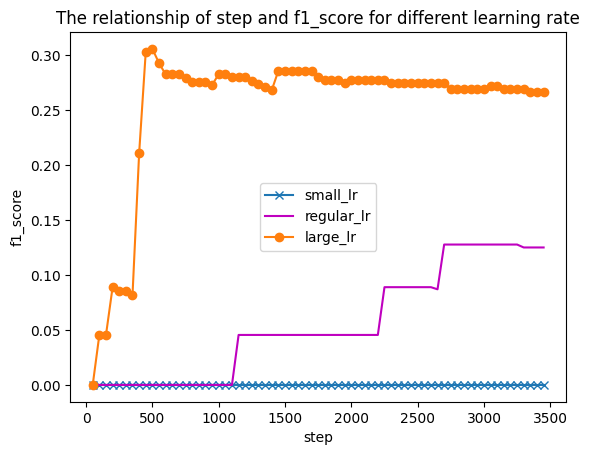

In [99]:
x = np.array(range(50,3467,50))
plt.figure()
plt.plot(x,f1_for_small_lr,"-x",x,f1_for_regular_lr,"-m",x,f1_for_large_lr,"-o")
plt.legend(["small_lr","regular_lr","large_lr"])
plt.xlabel("step")
plt.ylabel("f1_score")
plt.title("The relationship of step and f1_score for different learning rate")

As the figures show, we can see the increase in learning rate will also increase the speed of loss decrease and cause a quick convergence speed. And for the f1 score, we can see the increase in learning rate will promote the speed of the f1 score increase. When the learning rate is 0.005, the f1 score even retains 0, which means we should increase the learning rate to make the model converge quickly; when the learning rate is too big, the training model might converge too quickly and even miss the optimal solution and reach to the suboptimal point, which is also inadvisable.

In summary, I use two different methods to predict the f1 score for the test dataset in kaggle. First, I design the Logistic Regression Algorism by NumPy library and reach the f1 score of 0.25668. Second, I implement the PyTorch library and get the f1 score of 0.29946, which is higher than the score I get using the NumPy library. Therefore, using the PyTorch library will result in a better model for me.